# Part 1 : Some basics of Linear Programming & Mixed Integer Programming: Application to The Vertex Cover Problem

This notebook contain all the code i used to demonstrate and to visualize the principles i presented in the article: 
I will try to keep it as "natural as possible" so you can reuse the pieces of code, if you want to understand the deep behaviours of what i'm doing refer to my medium article or to Julia's Documentation.

In [1]:
using Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")
Pkg.add("LinearAlgebra")
Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("BenchmarkTools")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.ju

In [3]:
using JuMP
using GLPK
using LinearAlgebra
using Plots
using BenchmarkTools
pyplot()

Plots.PyPlotBackend()

In [6]:
prgrm = Model()
set_optimizer(prgrm, GLPK.Optimizer)
@variable(prgrm, 0<=x)
@variable(prgrm, 0<=y)
@constraint(prgrm, x <= 10)
@constraint(prgrm, y <= 7.5)
@objective(prgrm, Max, x+2y)
prgrm

A JuMP Model
Maximization problem with:
Variables: 2
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.LessThan{Float64}`: 2 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK
Names registered in the model: x, y

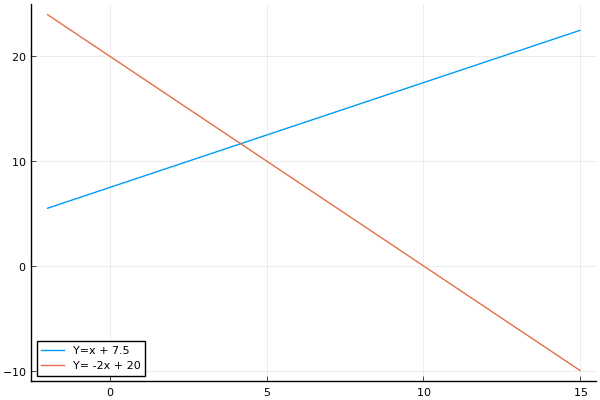

In [16]:
x_v = LinRange(-2,15,100)
plot([x_v], [x_v .+ 7.5], label ="Y=x + 7.5")
plot!([x_v], [-2x_v .+ 20], label ="Y= -2x + 20")


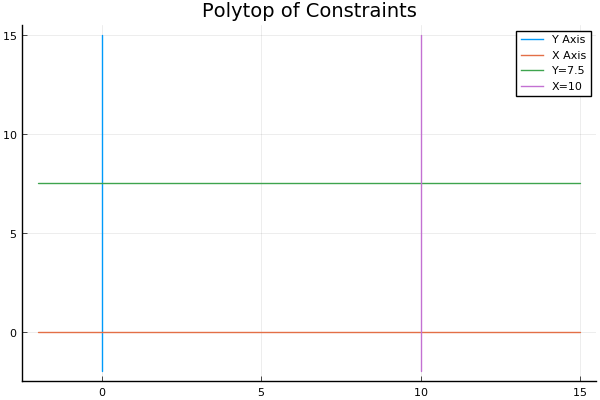

In [26]:
x_v = LinRange(-2,15,100)
y_v = LinRange(-2,15,100)
plot([0*x_v], [y_v],label ="Y Axis")
plot!([x_v], [0*x_v],label ="X Axis")
plot!([x_v], [0*x_v .+ 7.5], label ="Y=7.5")
plot!([0*x_v .+ 10], [y_v],label ="X=10")
plot!(title = "Polytop of Constraints")

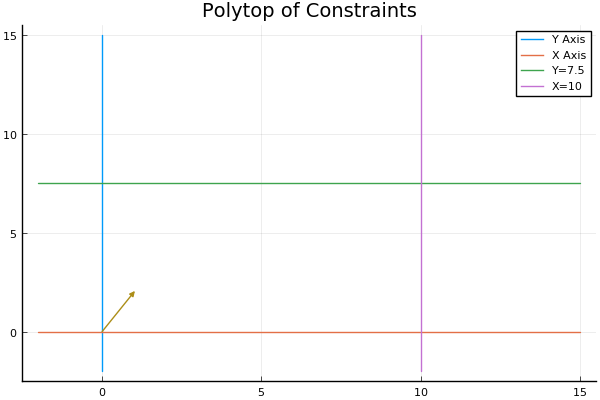

In [27]:
quiver!([0],[0],quiver=([1],[2]))

In [28]:
optimize!(prgrm)

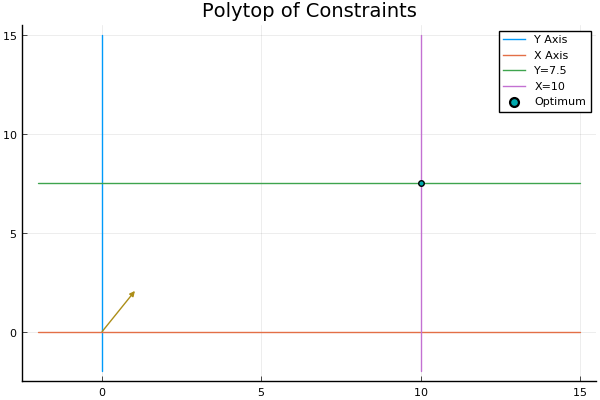

In [29]:
plot!([value.(x)], [value.(y)], seriestype = :scatter, label="Optimum")

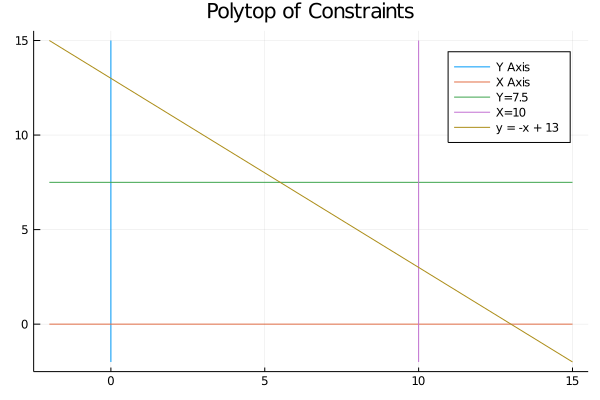

In [401]:
plot([0*x_v], [y_v],label ="Y Axis")
plot!([x_v], [0*x_v],label ="X Axis")
plot!([x_v], [0*x_v .+ 7.5], label ="Y=7.5")
plot!([0*x_v .+ 10], [y_v],label ="X=10")
plot!(title = "Polytop of Constraints")
plot!([x_v], [-x_v .+ 13], label="y = -x + 13")

In [402]:
@constraint(prgrm, y <= -x+13)
prgrm

A JuMP Model
Maximization problem with:
Variables: 2
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.LessThan{Float64}`: 3 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: GLPK
Names registered in the model: x, y

In [403]:
optimize!(prgrm)

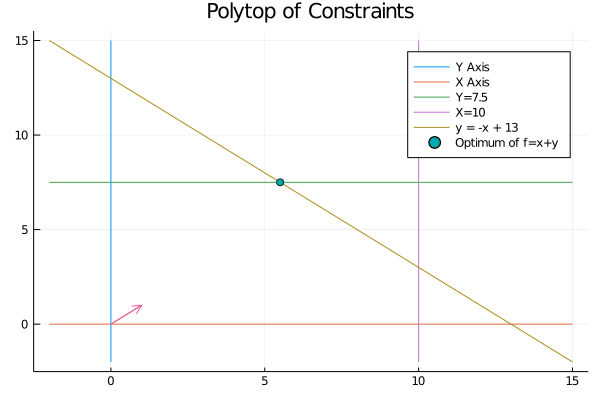

In [404]:
plot!([value.(x)], [value.(y)], seriestype = :scatter , label="Optimum of f=x+y")
quiver!([0],[0],quiver=([1],[1]))

In [405]:
@objective(prgrm, Max, 2x+y)
prgrm

A JuMP Model
Maximization problem with:
Variables: 2
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.LessThan{Float64}`: 3 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: GLPK
Names registered in the model: x, y

In [406]:
optimize!(prgrm)

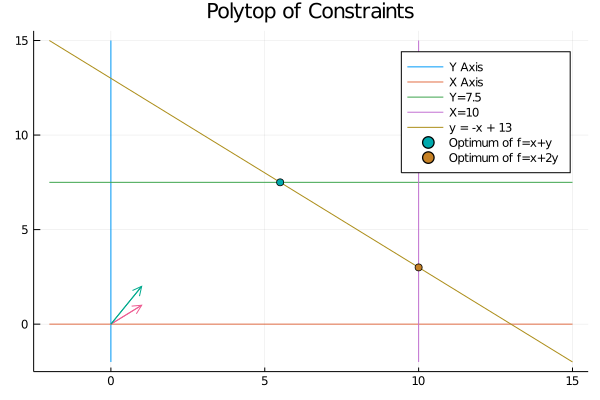

In [407]:
plot!([value.(x)], [value.(y)], seriestype = :scatter , label="Optimum of f=x+2y")
quiver!([0],[0],quiver=([1],[2]))

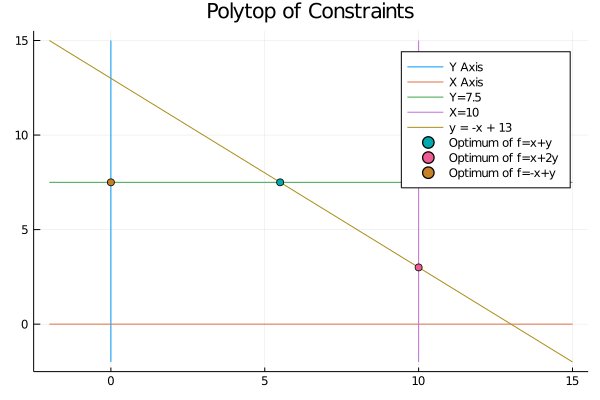

In [336]:
@objective(prgrm, Max, -x+y)
optimize!(prgrm)
plot!([value.(x)], [value.(y)], seriestype = :scatter , label="Optimum of f=-x+y")

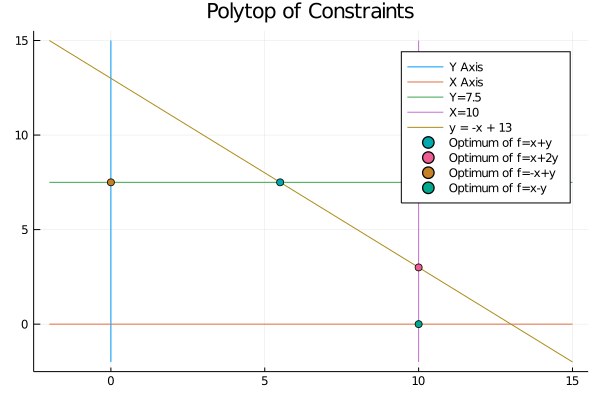

In [337]:
@objective(prgrm, Max, x-y)
optimize!(prgrm)
plot!([value.(x)], [value.(y)], seriestype = :scatter , label="Optimum of f=x-y")

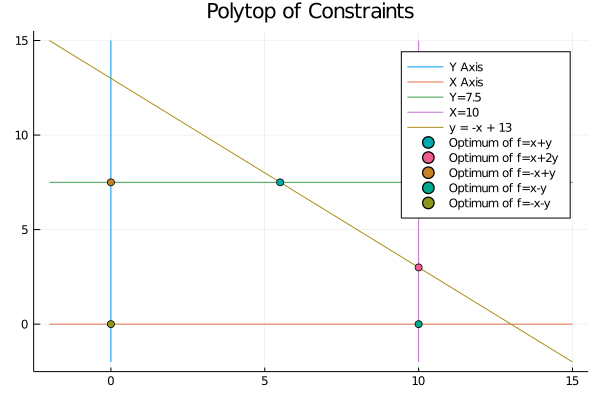

In [338]:
@objective(prgrm, Max, -x-y)
optimize!(prgrm)
plot!([value.(x)], [value.(y)], seriestype = :scatter , label="Optimum of f=-x-y")

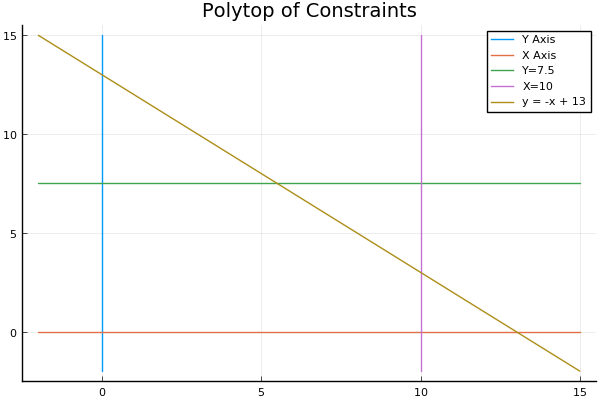

In [97]:
plot([0*x_v], [y_v],label ="Y Axis")
plot!([x_v], [0*x_v],label ="X Axis")
plot!([x_v], [0*x_v .+ 7.5], label ="Y=7.5")
plot!([0*x_v .+ 10], [y_v],label ="X=10")
plot!(title = "Polytop of Constraints")
plot!([x_v], [-x_v .+ 13], label="y = -x + 13")

In [99]:
for k in 1:size(x_v)[1]
    x_i = trunc(Int, x_v[k])
    if(x_i >= 0 && x_i <=10)
        for j in 1:size(y_v)[1]
            y_i = trunc(Int, x_v[j])
            if(y_i >= 0 && y_i<=7.5 && -x_i+13>=y_i ) 
                println(x_i," , " ,y_i)
                scatter!([x_i,], [y_i,],  legend = false, color="grey")
            end
        end
    end
end

0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 1
0 , 1
0 , 1
0 , 1
0 , 1
0 , 1
0 , 2
0 , 2
0 , 2
0 , 2
0 , 2
0 , 2
0 , 3
0 , 3
0 , 3
0 , 3
0 , 3
0 , 4
0 , 4
0 , 4
0 , 4
0 , 4
0 , 4
0 , 5
0 , 5
0 , 5
0 , 5
0 , 5
0 , 5
0 , 6
0 , 6
0 , 6
0 , 6
0 , 6
0 , 6
0 , 7
0 , 7
0 , 7
0 , 7
0 , 7
0 , 7
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 1
0 , 1
0 , 1
0 , 1
0 , 1
0 , 1
0 , 2
0 , 2
0 , 2
0 , 2
0 , 2
0 , 2
0 , 3
0 , 3
0 , 3
0 , 3
0 , 3
0 , 4
0 , 4
0 , 4
0 , 4
0 , 4
0 , 4
0 , 5
0 , 5
0 , 5
0 , 5
0 , 5
0 , 5
0 , 6
0 , 6
0 , 6
0 , 6
0 , 6
0 , 6
0 , 7
0 , 7
0 , 7
0 , 7
0 , 7
0 , 7
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 1
0 , 1
0 , 1
0 , 1
0 , 1
0 , 1
0 , 2
0 , 2
0 , 2
0 , 2
0 , 2
0 , 2
0 , 3
0 , 3
0 , 3
0 , 3
0 , 3
0 , 4
0 , 4
0 , 4
0 , 4
0 , 4
0 , 4
0 , 5
0 , 5
0 , 5
0 , 5
0 , 5
0 , 5
0 , 6
0 , 6
0 , 6
0 , 6
0 , 6
0 , 6
0 , 7
0 , 7
0 , 7
0 , 7
0 , 7
0 , 7
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 0
0 , 

3 , 7
3 , 0
3 , 0
3 , 0
3 , 0
3 , 0
3 , 0
3 , 0
3 , 0
3 , 0
3 , 0
3 , 0
3 , 0
3 , 1
3 , 1
3 , 1
3 , 1
3 , 1
3 , 1
3 , 2
3 , 2
3 , 2
3 , 2
3 , 2
3 , 2
3 , 3
3 , 3
3 , 3
3 , 3
3 , 3
3 , 4
3 , 4
3 , 4
3 , 4
3 , 4
3 , 4
3 , 5
3 , 5
3 , 5
3 , 5
3 , 5
3 , 5
3 , 6
3 , 6
3 , 6
3 , 6
3 , 6
3 , 6
3 , 7
3 , 7
3 , 7
3 , 7
3 , 7
3 , 7
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 1
4 , 1
4 , 1
4 , 1
4 , 1
4 , 1
4 , 2
4 , 2
4 , 2
4 , 2
4 , 2
4 , 2
4 , 3
4 , 3
4 , 3
4 , 3
4 , 3
4 , 4
4 , 4
4 , 4
4 , 4
4 , 4
4 , 4
4 , 5
4 , 5
4 , 5
4 , 5
4 , 5
4 , 5
4 , 6
4 , 6
4 , 6
4 , 6
4 , 6
4 , 6
4 , 7
4 , 7
4 , 7
4 , 7
4 , 7
4 , 7
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 1
4 , 1
4 , 1
4 , 1
4 , 1
4 , 1
4 , 2
4 , 2
4 , 2
4 , 2
4 , 2
4 , 2
4 , 3
4 , 3
4 , 3
4 , 3
4 , 3
4 , 4
4 , 4
4 , 4
4 , 4
4 , 4
4 , 4
4 , 5
4 , 5
4 , 5
4 , 5
4 , 5
4 , 5
4 , 6
4 , 6
4 , 6
4 , 6
4 , 6
4 , 6
4 , 7
4 , 7
4 , 7
4 , 7
4 , 7
4 , 7
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 0
4 , 

8 , 4
8 , 4
8 , 5
8 , 5
8 , 5
8 , 5
8 , 5
8 , 5
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 1
8 , 1
8 , 1
8 , 1
8 , 1
8 , 1
8 , 2
8 , 2
8 , 2
8 , 2
8 , 2
8 , 2
8 , 3
8 , 3
8 , 3
8 , 3
8 , 3
8 , 4
8 , 4
8 , 4
8 , 4
8 , 4
8 , 4
8 , 5
8 , 5
8 , 5
8 , 5
8 , 5
8 , 5
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 1
8 , 1
8 , 1
8 , 1
8 , 1
8 , 1
8 , 2
8 , 2
8 , 2
8 , 2
8 , 2
8 , 2
8 , 3
8 , 3
8 , 3
8 , 3
8 , 3
8 , 4
8 , 4
8 , 4
8 , 4
8 , 4
8 , 4
8 , 5
8 , 5
8 , 5
8 , 5
8 , 5
8 , 5
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 0
8 , 1
8 , 1
8 , 1
8 , 1
8 , 1
8 , 1
8 , 2
8 , 2
8 , 2
8 , 2
8 , 2
8 , 2
8 , 3
8 , 3
8 , 3
8 , 3
8 , 3
8 , 4
8 , 4
8 , 4
8 , 4
8 , 4
8 , 4
8 , 5
8 , 5
8 , 5
8 , 5
8 , 5
8 , 5
9 , 0
9 , 0
9 , 0
9 , 0
9 , 0
9 , 0
9 , 0
9 , 0
9 , 0
9 , 0
9 , 0
9 , 0
9 , 1
9 , 1
9 , 1
9 , 1
9 , 1
9 , 1
9 , 2
9 , 2
9 , 2
9 , 2
9 , 2
9 , 2
9 , 3
9 , 3
9 , 3
9 , 3
9 , 3
9 , 4
9 , 4
9 , 4
9 , 4
9 , 4
9 , 4
9 , 

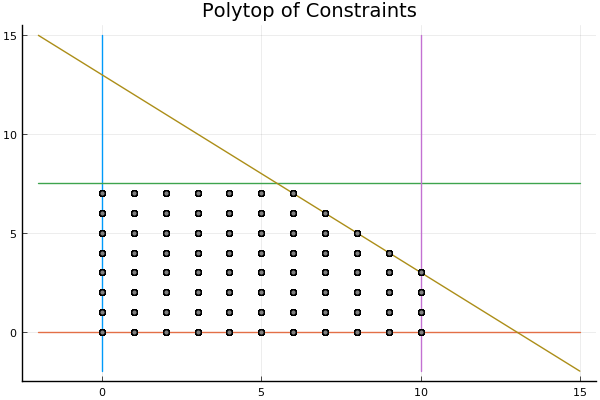

In [100]:
plot!()

In [104]:
prgrm = Model()
set_optimizer(prgrm, GLPK.Optimizer)
@variable(prgrm, 0<=x)
@variable(prgrm, 0<=y)
@constraint(prgrm, x <= 10)
@constraint(prgrm, y <= 7.5)
@constraint(prgrm, y <= -x+13)
@objective(prgrm, Max, 2x+y)
prgrm

A JuMP Model
Maximization problem with:
Variables: 2
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.LessThan{Float64}`: 3 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK
Names registered in the model: x, y

In [105]:
optimize!(prgrm)

In [106]:
value.(y)

3.0

In [107]:
value.(x)


10.0

In [108]:
prgrm = Model()
set_optimizer(prgrm, GLPK.Optimizer)
@variable(prgrm, 0<=x)
@variable(prgrm, 0<=y)
@constraint(prgrm, x <= 10)
@constraint(prgrm, y <= 7.5)
@constraint(prgrm, y <= -x+13)
@objective(prgrm, Max, x+2y)
prgrm

A JuMP Model
Maximization problem with:
Variables: 2
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.LessThan{Float64}`: 3 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK
Names registered in the model: x, y

In [109]:
optimize!(prgrm)

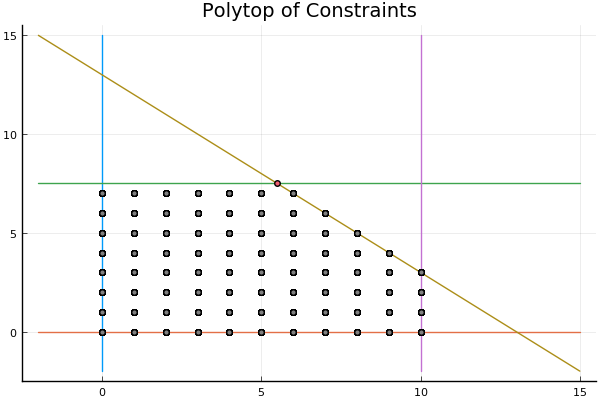

In [113]:
scatter!([value.(x),], [value.(y),], label="Fractionnal optimum")


In [115]:
value.(y)

7.5

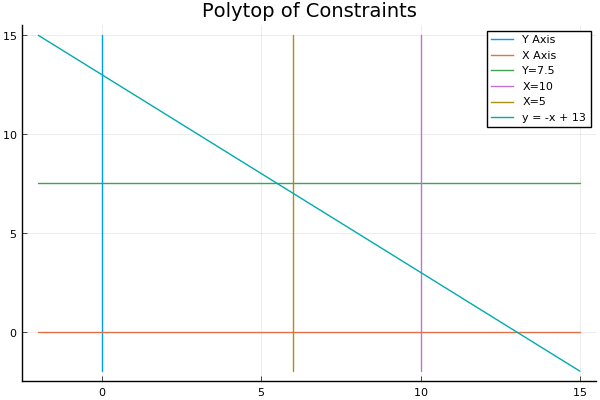

In [124]:
plot([0*x_v], [y_v],label ="Y Axis")
plot!([x_v], [0*x_v],label ="X Axis")
plot!([x_v], [0*x_v .+ 7.5], label ="Y=7.5")
plot!([0*x_v .+ 10], [y_v],label ="X=10")
plot!([0*x_v .+ 5], [y_v],label ="X=5")

plot!(title = "Polytop of Constraints")
plot!([x_v], [-x_v .+ 13], label="y = -x + 13")

In [112]:
for k in 1:size(x_v)[1]
    x_i = trunc(Int, x_v[k])
    if(x_i >= 0 && x_i <=10 && x_i <= 5)
        for j in 1:size(y_v)[1]
            y_i = trunc(Int, x_v[j])
            if(y_i >= 0 && y_i<=7.5 && -x_i+13>=y_i ) 
                scatter!([x_i,], [y_i,],  legend = false, color="grey")
            end
        end
    end
end

UndefVarError: [91mUndefVarError: x_v not defined[39m

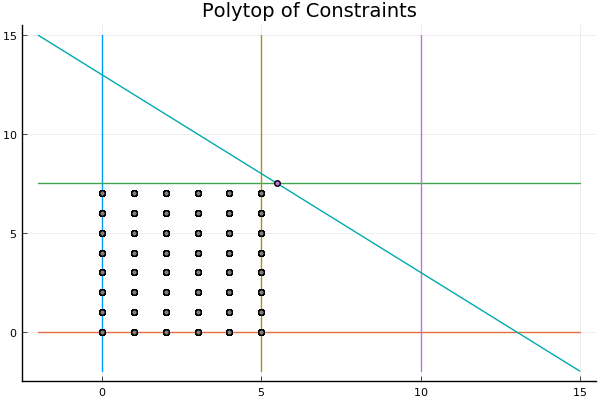

In [120]:
scatter!([value.(x),], [value.(y),], label="Fractionnal optimum")

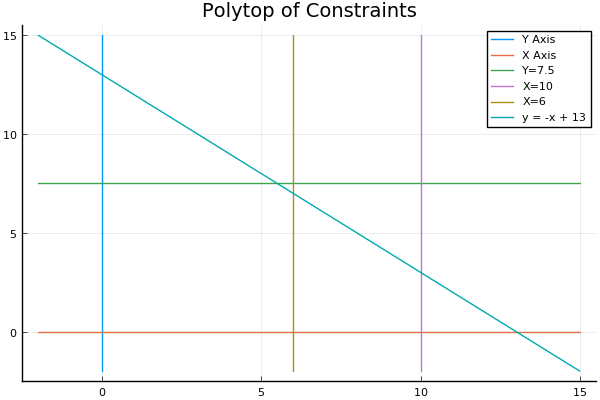

In [125]:
plot([0*x_v], [y_v],label ="Y Axis")
plot!([x_v], [0*x_v],label ="X Axis")
plot!([x_v], [0*x_v .+ 7.5], label ="Y=7.5")
plot!([0*x_v .+ 10], [y_v],label ="X=10")
plot!([0*x_v .+ 6], [y_v],label ="X=6")
plot!(title = "Polytop of Constraints")
plot!([x_v], [-x_v .+ 13], label="y = -x + 13")

In [113]:
for k in 1:size(x_v)[1]
    x_i = trunc(Int, x_v[k])
    if(x_i >= 0 && x_i <=10 && x_i >= 6)
        for j in 1:size(y_v)[1]
            y_i = trunc(Int, x_v[j])
            if(y_i >= 0 && y_i<=7.5 && -x_i+13>=y_i ) 
                scatter!([x_i,], [y_i,],  legend = false, color="grey")
            end
        end
    end
end

UndefVarError: [91mUndefVarError: x_v not defined[39m

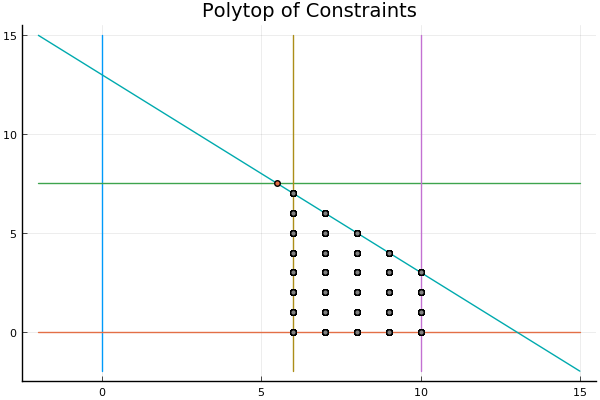

In [127]:
scatter!([value.(x),], [value.(y),], label="Fractionnal optimum")

In [130]:
prgrm = Model()
set_optimizer(prgrm, GLPK.Optimizer)
@variable(prgrm, 0<=x)
@variable(prgrm, 0<=y)
@constraint(prgrm, x <= 10)
@constraint(prgrm, x<= 5)
@constraint(prgrm, y <= 7.5)
@constraint(prgrm, y <= -x+13)
@objective(prgrm, Max, x+2y)
optimize!(prgrm)
println(value.(x) , " ; ", value.(y))

5.0 ; 7.5


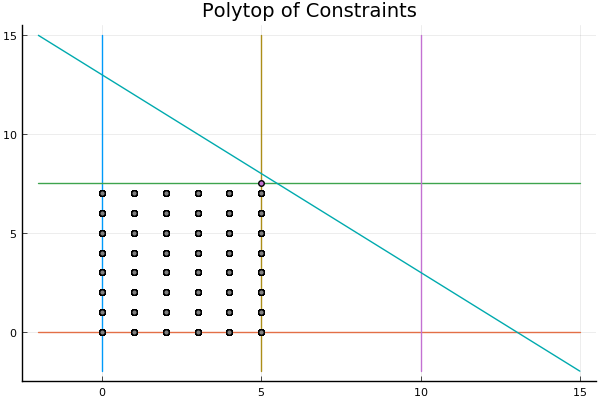

In [133]:
plot([0*x_v], [y_v],label ="Y Axis")
plot!([x_v], [0*x_v],label ="X Axis")
plot!([x_v], [0*x_v .+ 7.5], label ="Y=7.5")
plot!([0*x_v .+ 10], [y_v],label ="X=10")
plot!([0*x_v .+ 5], [y_v],label ="X=5")

plot!(title = "Polytop of Constraints")
plot!([x_v], [-x_v .+ 13], label="y = -x + 13")

for k in 1:size(x_v)[1]
    x_i = trunc(Int, x_v[k])
    if(x_i >= 0 && x_i <=10 && x_i <= 5)
        for j in 1:size(y_v)[1]
            y_i = trunc(Int, x_v[j])
            if(y_i >= 0 && y_i<=7.5 && -x_i+13>=y_i ) 
                scatter!([x_i,], [y_i,],  legend = false, color="grey")
            end
        end
    end
end
scatter!([value.(x),], [value.(y),], label="New optimum")

In [134]:
(value.(x), value.(y))

(5.0, 7.5)

In [135]:
prgrm = Model()
set_optimizer(prgrm, GLPK.Optimizer)
@variable(prgrm, 0<=x)
@variable(prgrm, 0<=y)
@constraint(prgrm, x <= 10)
@constraint(prgrm, x<= 5)
@constraint(prgrm, y <= 7)
@constraint(prgrm, y <= 7.5)
@constraint(prgrm, y <= -x+13)
@objective(prgrm, Max, x+2y)
optimize!(prgrm)
println(value.(x) , " ; ", value.(y))

5.0 ; 7.0


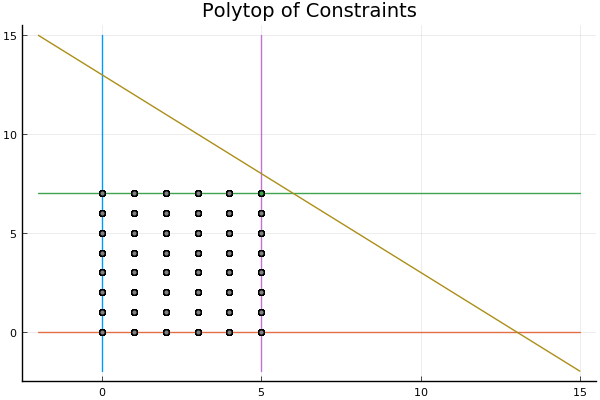

In [137]:
plot([0*x_v], [y_v],label ="Y Axis")
plot!([x_v], [0*x_v],label ="X Axis")
plot!([x_v], [0*x_v .+ 7], label ="Y=7")
plot!([0*x_v .+ 5], [y_v],label ="X=5")

plot!(title = "Polytop of Constraints")
plot!([x_v], [-x_v .+ 13], label="y = -x + 13")

for k in 1:size(x_v)[1]
    x_i = trunc(Int, x_v[k])
    if(x_i >= 0 && x_i <=10 && x_i <= 5)
        for j in 1:size(y_v)[1]
            y_i = trunc(Int, x_v[j])
            if(y_i >= 0 && y_i<=7 && -x_i+13>=y_i ) 
                scatter!([x_i,], [y_i,],  legend = false, color="grey")
            end
        end
    end
end
scatter!([value.(x),], [value.(y),], label="New optimum")

In [139]:
prgrm = Model()
set_optimizer(prgrm, GLPK.Optimizer)
@variable(prgrm, 0<=x)
@variable(prgrm, 0<=y)

@constraint(prgrm, x <= 10)
@constraint(prgrm, x >= 6)
@constraint(prgrm, y <= 7.5)
@constraint(prgrm, y <= -x+13)
@objective(prgrm, Max, x+2y)
optimize!(prgrm)
println(value.(x) , " ; ", value.(y))

6.0 ; 7.0


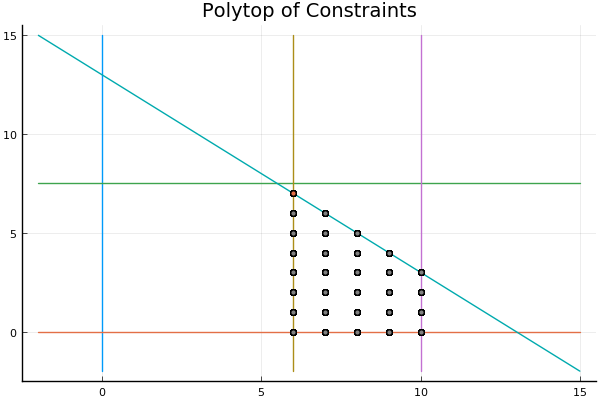

In [140]:
plot([0*x_v], [y_v],label ="Y Axis")
plot!([x_v], [0*x_v],label ="X Axis")
plot!([x_v], [0*x_v .+ 7.5], label ="Y=7.5")
plot!([0*x_v .+ 10], [y_v],label ="X=10")
plot!([0*x_v .+ 6], [y_v],label ="X=6")

plot!(title = "Polytop of Constraints")
plot!([x_v], [-x_v .+ 13], label="y = -x + 13")

for k in 1:size(x_v)[1]
    x_i = trunc(Int, x_v[k])
    if(x_i >= 0 && x_i <=10 && x_i >= 6)
        for j in 1:size(y_v)[1]
            y_i = trunc(Int, x_v[j])
            if(y_i >= 0 && y_i<=7.5 && -x_i+13>=y_i ) 
                scatter!([x_i,], [y_i,],  legend = false, color="grey")
            end
        end
    end
end
scatter!([value.(x),], [value.(y),], label="New optimum")

In [142]:
prgrm = Model()
set_optimizer(prgrm, GLPK.Optimizer)
@variable(prgrm, 0<=x, Int)
@variable(prgrm, 0<=y, Int)
@constraint(prgrm, x <= 10)
@constraint(prgrm, y <= 7.5)
@objective(prgrm, Max, x+2y)
@constraint(prgrm, y <= -x+13)
optimize!(prgrm)

In [143]:
println(value.(x) , " ; ", value.(y))

6.0 ; 7.0


#Vertex Cover

In [195]:
n = 6
ADJ_MAT = [
    [0 , 0 , 1, 0, 0, 0] 
    [0 , 0 , 1, 0, 0, 0] 
    [1 , 1 , 0, 1, 0, 0] 
    [0 , 0 , 1, 0, 1, 0] 
    [0 , 0 , 0, 1, 0, 1] 
    [0 , 0 , 0, 0, 1, 0] 
]
ADJ_MAT = reshape(ADJ_MAT, (n,n))

6×6 Array{Int32,2}:
 0  0  1  0  0  0
 0  0  1  0  0  0
 1  1  0  1  0  0
 0  0  1  0  1  0
 0  0  0  1  0  1
 0  0  0  0  1  0

In [215]:
prgrm2 = Model()
set_optimizer(prgrm2, GLPK.Optimizer)
@variable(prgrm2, 0<=x[1:n], Int)

6-element Array{VariableRef,1}:
 x[1]
 x[2]
 x[3]
 x[4]
 x[5]
 x[6]

In [216]:
for i in 1:n
    for j in 1:n
        if(ADJ_MAT[i,j] == 1)
            c = @constraint(prgrm2, x[i] + x[j] >= 1)
            set_name(c,"C")
            println(c)
        end
    end
end

C : x[1] + x[3] ≥ 1.0
C : x[2] + x[3] ≥ 1.0
C : x[1] + x[3] ≥ 1.0
C : x[2] + x[3] ≥ 1.0
C : x[3] + x[4] ≥ 1.0
C : x[3] + x[4] ≥ 1.0
C : x[4] + x[5] ≥ 1.0
C : x[4] + x[5] ≥ 1.0
C : x[5] + x[6] ≥ 1.0
C : x[5] + x[6] ≥ 1.0


In [217]:
sum(x)

x[1] + x[2] + x[3] + x[4] + x[5] + x[6]

In [218]:
@objective(prgrm2, Min, sum(x))

x[1] + x[2] + x[3] + x[4] + x[5] + x[6]

In [219]:
prgrm2

A JuMP Model
Minimization problem with:
Variables: 6
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.GreaterThan{Float64}`: 10 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 6 constraints
`VariableRef`-in-`MathOptInterface.Integer`: 6 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK
Names registered in the model: x

In [220]:
optimize!(prgrm2)

In [222]:
value.(x)

6-element Array{Float64,1}:
 0.0
 0.0
 1.0
 0.0
 1.0
 0.0

In [4]:
function generate_adj(n)
    return rand(0:1,(n,n))
end

generate_adj (generic function with 1 method)

In [43]:
function mip_build(ADJ_MAT, n)
    prgrm2 = Model()
    set_optimizer(prgrm2, GLPK.Optimizer)
    @variable(prgrm2, 0<=x[1:n], Int)
    for i in 1:n
        for j in 1:n
            if(ADJ_MAT[i,j] == 1)
                c = @constraint(prgrm2, x[i] + x[j] >= 1)
                set_name(c,"C")
            end
        end
    end
    @objective(prgrm2, Min, sum(x))
    return prgrm2, x
end

mip_build (generic function with 1 method)

In [109]:
adj= generate_adj(20)
mod,x = mip_build(adj,20)
x

20-element Array{VariableRef,1}:
 x[1] 
 x[2] 
 x[3] 
 x[4] 
 x[5] 
 x[6] 
 x[7] 
 x[8] 
 x[9] 
 x[10]
 x[11]
 x[12]
 x[13]
 x[14]
 x[15]
 x[16]
 x[17]
 x[18]
 x[19]
 x[20]

In [110]:
function my_callback_function(cb_data)
    println("Call to callback")
    new_sol = []
    precedent = [callback_value(cb_data,x_k ) for x_k in x]
    for x_i in x
        x_val = callback_value(cb_data, x_i)
        x_new = ceil(Int, x_val)
        append!(new_sol, x_new)
    end
    println("Precedent: ", precedent)
    println("Line: ",new_sol)
    status = MOI.submit(
        mod, MOI.HeuristicSolution(cb_data), [x_i for x_i in x], [floor(Int, k) for k in new_sol]
    )
    
    println("status = ", status)
end


MOI.set(mod, MOI.HeuristicCallback(), my_callback_function)

my_callback_function (generic function with 1 method)

In [111]:
optimize!(mod)

Call to callback
Precedent: [0.5, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5]
Line: Any[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
status = HEURISTIC_SOLUTION_ACCEPTED
Call to callback
Precedent: [1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5]
Line: Any[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
status = HEURISTIC_SOLUTION_REJECTED
Call to callback
Precedent: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5]
Line: Any[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
status = HEURISTIC_SOLUTION_REJECTED
Call to callback
Precedent: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5]
Line: Any[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
status = HEURISTIC_SOLUTION_REJECTED
Call to callback
Precedent: [1.0, 1.0, 1.0, 1.0, 1.0, 1.